4-Sentiment Analysis

In [1]:
from pymongo import MongoClient
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
client = MongoClient("mongodb://localhost:27017/")
db = client["RetailCustomerDB"]

In [4]:
collection = db["Reviews Collection"]
reviews = list(collection.find())

In [6]:
reviews_df = pd.DataFrame(reviews)

In [7]:
print("✅ تم تحميل البيانات بنجاح!")
print("📦 عدد السجلات:", len(reviews_df))
print(reviews_df.head())

✅ تم تحميل البيانات بنجاح!
📦 عدد السجلات: 10000
                        _id                              ReviewID CustomerID  \
0  68eb09d35734ab0c10e72588  2599b5b3-1377-47b8-994b-5f113c9b0ed9  CUST00001   
1  68eb09d35734ab0c10e72589  701bcd98-7e9c-4162-b9c7-3eb49d317d27  CUST00001   
2  68eb09d35734ab0c10e7258a  a26abfc6-63c3-4080-b500-1613f1952d05  CUST00001   
3  68eb09d35734ab0c10e7258b  a61af88c-db95-4cfc-aaa7-968546559c8a  CUST00002   
4  68eb09d35734ab0c10e7258c  d7b6630c-731e-47b3-80b6-ef87fa6bddf5  CUST00002   

        CustomerName ProductID        ProductName     SaleID  Rating  \
0  Nicole Taylor DDS   PRD0416  LG Everything 615  SAL006551       1   
1  Nicole Taylor DDS   PRD0414    Lenovo Year 812  SAL008395       5   
2  Nicole Taylor DDS   PRD0268       Puma Own 684  SAL001758       2   
3  Michael Blackwell   PRD0305  Asus Training 344  SAL003433       3   
4  Michael Blackwell   PRD0388       Asus Own 772  SAL004120       4   

                    ReviewText ReviewD

C:\Users\C.M™\AppData\Local\Temp\ipykernel_1712\4282814988.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Sentiment',data=reviews_df,palette={'Positive': '#4CAF50', 'Negative': '#E74C3C', 'Neutral': '#F1C40F'})


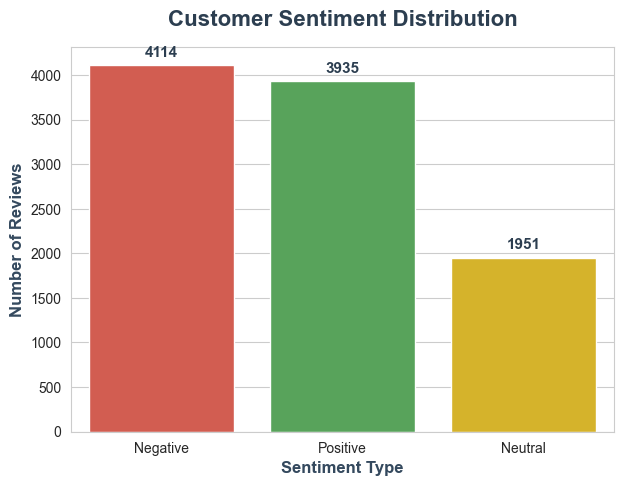

In [8]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")

ax = sns.countplot(x='Sentiment',data=reviews_df,palette={'Positive': '#4CAF50', 'Negative': '#E74C3C', 'Neutral': '#F1C40F'})

ax.set_title("Customer Sentiment Distribution", fontsize=16, fontweight='bold', color='#2C3E50', pad=15)
ax.set_xlabel("Sentiment Type", fontsize=12, fontweight='bold', color='#34495E')
ax.set_ylabel("Number of Reviews", fontsize=12, fontweight='bold', color='#34495E')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=11, weight='bold', color='#2C3E50', padding=4)

plt.show()



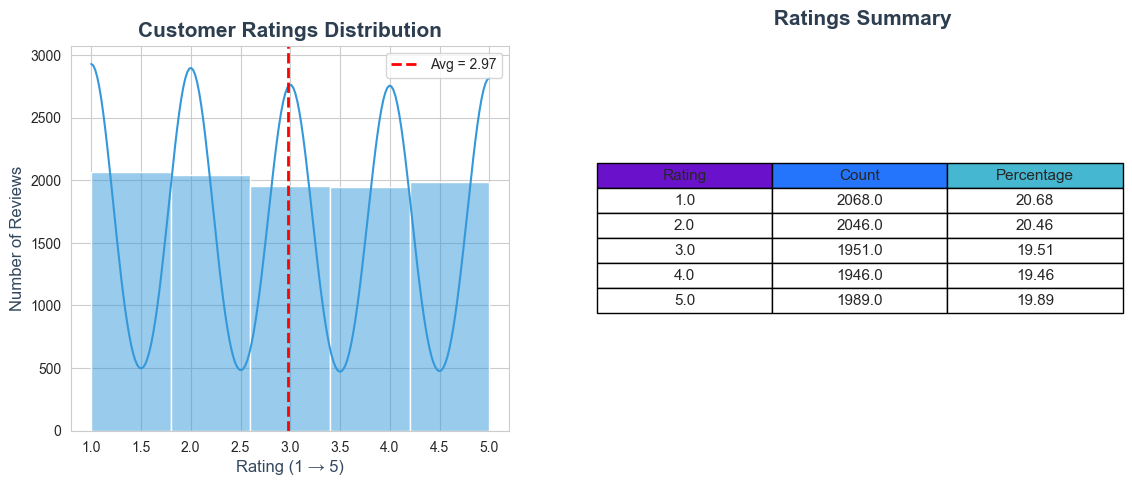

In [9]:
rating_counts = reviews_df['Rating'].value_counts().sort_index().reset_index()
rating_counts.columns = ['Rating', 'Count']
rating_counts['Percentage'] = (rating_counts['Count'] / rating_counts['Count'].sum() * 100).round(2)


sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
plt.subplots_adjust(wspace=0.3)

# ---------------------------------
# 🎯 الجزء الأول: رسم التوزيع
# ---------------------------------
sns.histplot(data=reviews_df,x='Rating',bins=5,kde=True,color="#3498db",ax=axes[0])
axes[0].set_title("Customer Ratings Distribution", fontsize=15, fontweight='bold', color='#2C3E50')
axes[0].set_xlabel("Rating (1 → 5)", fontsize=12, color='#34495E')
axes[0].set_ylabel("Number of Reviews", fontsize=12, color='#34495E')


avg_rating = reviews_df['Rating'].mean()
axes[0].axvline(avg_rating, color='red', linestyle='--', linewidth=2, label=f'Avg = {avg_rating:.2f}')
axes[0].legend()

# ---------------------------------
# 📋 الجزء الثاني: جدول القيم
# ---------------------------------
axes[1].axis('off')
table = axes[1].table(cellText=rating_counts.values,colLabels=rating_counts.columns,loc='center',cellLoc='center',colColours=['#6a11cb', '#2575fc', '#45b7d1'])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.5)
axes[1].set_title(" Ratings Summary", fontsize=15, fontweight='bold', color='#2C3E50', pad=15)

plt.show()

C:\Users\C.M™\AppData\Local\Temp\ipykernel_1712\3112242949.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_positive,x='Count', y='ProductName',ax=axes[0],palette='Greens_r')
C:\Users\C.M™\AppData\Local\Temp\ipykernel_1712\3112242949.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_negative,x='Count', y='ProductName',ax=axes[1],palette='Reds_r')


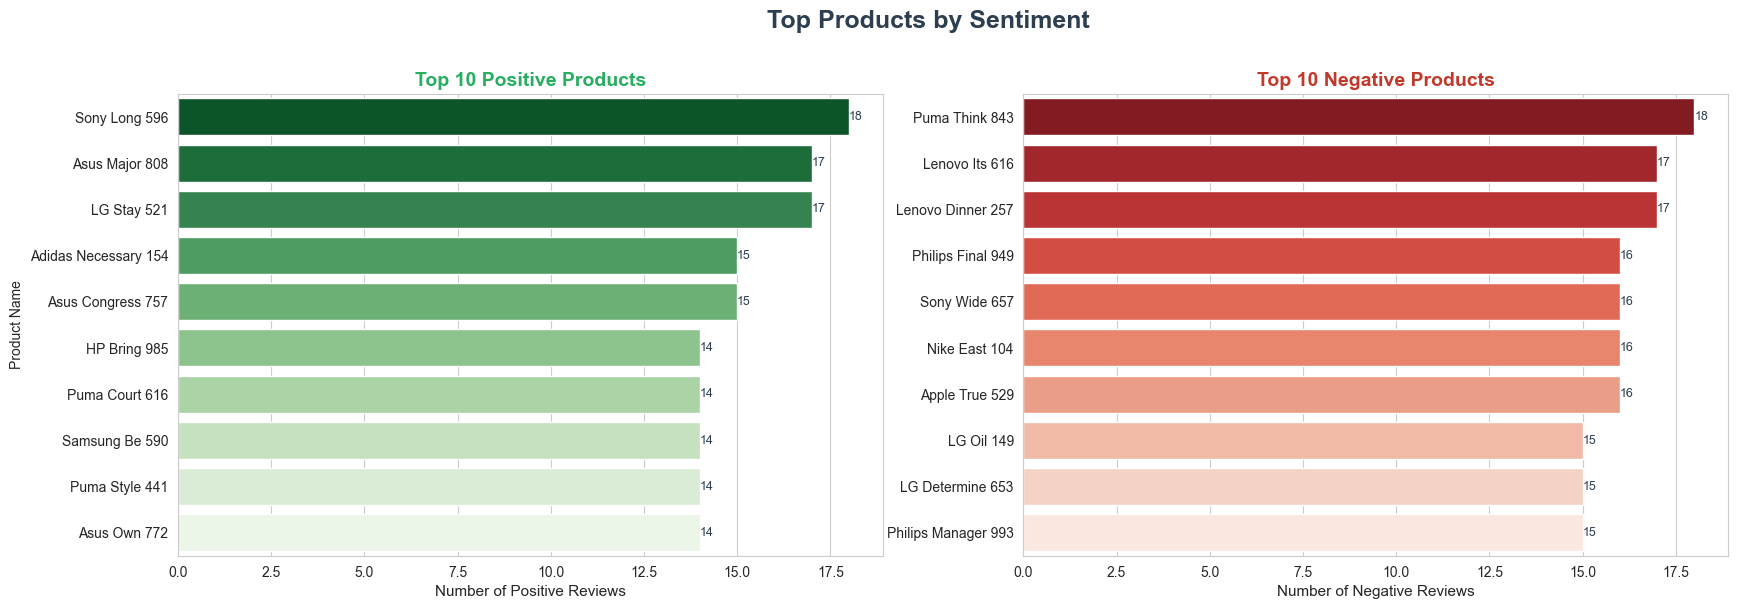

In [10]:
sns.set_style("whitegrid")

#  عدد التعليقات حسب المنتج ونوع المشاعر
sentiment_by_product =(reviews_df.groupby(['ProductName', 'Sentiment']).size().reset_index(name='Count'))


#  نختار المنتجات الأكثر إيجابية وسلبية
top_positive =(sentiment_by_product[sentiment_by_product['Sentiment'] == 'Positive'].sort_values(by='Count', ascending=False).head(10))
top_negative =(sentiment_by_product[sentiment_by_product['Sentiment'] == 'Negative'].sort_values(by='Count', ascending=False).head(10))


fig, axes = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle("Top Products by Sentiment", fontsize=18, fontweight='bold', color='#2C3E50', y=1.02)



#  المنتجات الإيجابية
sns.barplot(data=top_positive,x='Count', y='ProductName',ax=axes[0],palette='Greens_r')
axes[0].set_title("Top 10 Positive Products", fontsize=14, fontweight='bold', color='#27ae60')
axes[0].set_xlabel("Number of Positive Reviews", fontsize=11)
axes[0].set_ylabel("Product Name")
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge', fontsize=9, color='#2C3E50')



#  المنتجات السلبية
sns.barplot(data=top_negative,x='Count', y='ProductName',ax=axes[1],palette='Reds_r')
axes[1].set_title("Top 10 Negative Products", fontsize=14, fontweight='bold', color='#c0392b')
axes[1].set_xlabel("Number of Negative Reviews", fontsize=11)
axes[1].set_ylabel("")
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d', label_type='edge', fontsize=9, color='#2C3E50')


plt.show()
